<a href="https://colab.research.google.com/github/NatRmrz/Microproyecto/blob/main/Tarea_2_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Natalia Ramirez**

Tarea 2 parte 2





In [2]:
#Importar librerías
import numpy as np
import scipy as cp
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

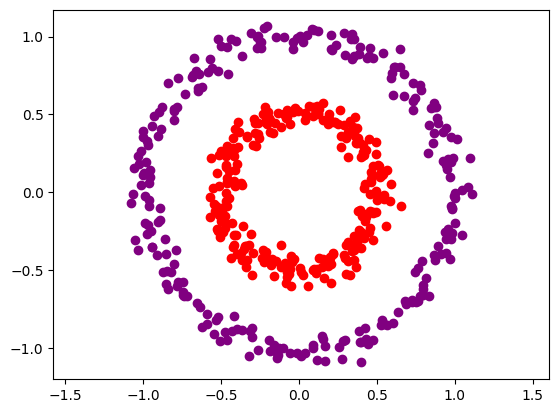

In [44]:
#Creación del dataset

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor = 0.5, noise=0.05)
#"factor" es la distancia en que se encuentran los circulos y "noise" corresponde al ruido para asemejarlo a la realidad

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0,0], X[Y[:, 0] == 0,1], c = "purple")
plt.scatter(X[Y[:, 0] == 1,0], X[Y[:, 0] == 1,1], c = "red")
plt.axis("equal")
plt.show()

In [16]:

#Creación la capa de la red
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur)      * 2 - 1     #Vector para iniciar parámetro de bias de forma aleatoria
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1     #Matriz para inicializar

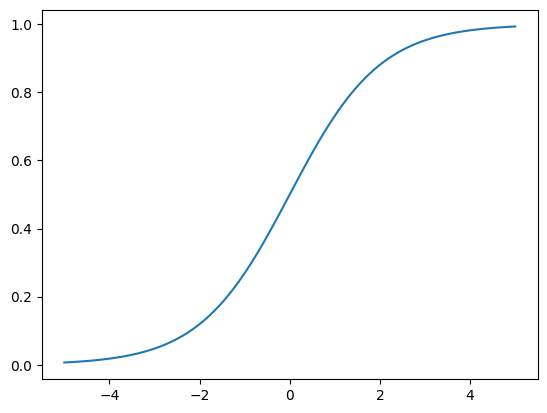

In [17]:

#Creación de las funciones de activación

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))


_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))

In [18]:

l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)

def create_nn(topology, act_f):

  nn = []
  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn



In [19]:
topology = [p, 4, 8, 1]  #Cantidad de capas ocultas que tiene la red neuronal

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), #Error cuadrático medio  (Función de coste)
           lambda Yp, Yr: (Yp - Yr))               #Derivada


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]

  #Forward pass (procesamiento de la red neuronal)
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z,a))

  if train:

    # Backpropagation
    deltas = []

    for l in reversed(range(0, len(neural_net))):
      #Reversed ayuda a que se evalúe de atrás hacia delante

      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        #Calcular delta de la última capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))

      else:
        #Calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W
      # Descenso del gradiente
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr

      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)

array([[0.48683743],
       [0.50300045],
       [0.49322844],
       [0.50180882],
       [0.51295347],
       [0.50755195],
       [0.48323174],
       [0.49001598],
       [0.48246935],
       [0.49646925],
       [0.51359457],
       [0.48346835],
       [0.48900813],
       [0.50714282],
       [0.50684096],
       [0.49418208],
       [0.50458811],
       [0.48535871],
       [0.50388649],
       [0.50253502],
       [0.48267694],
       [0.48654013],
       [0.48474656],
       [0.52154855],
       [0.51955834],
       [0.49841684],
       [0.49269018],
       [0.48240835],
       [0.51861447],
       [0.51603991],
       [0.48158183],
       [0.49832838],
       [0.48894636],
       [0.48697896],
       [0.51782139],
       [0.52129228],
       [0.48309313],
       [0.50298087],
       [0.52033643],
       [0.51282319],
       [0.48814381],
       [0.50854159],
       [0.50895495],
       [0.50802521],
       [0.5108132 ],
       [0.49074972],
       [0.4811168 ],
       [0.485

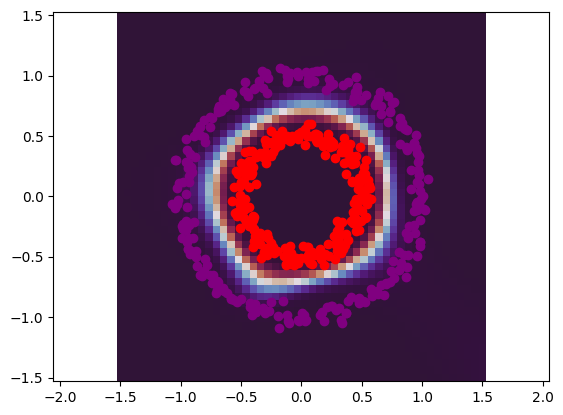

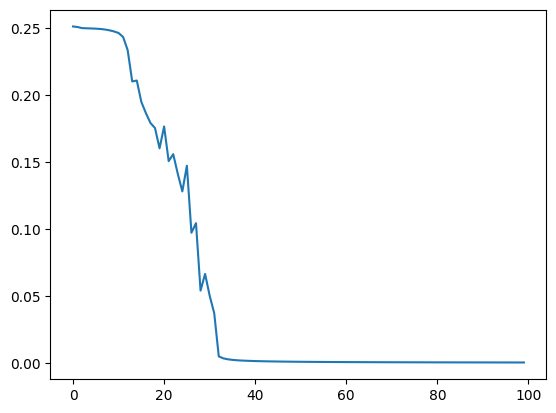

In [43]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  if i % 25 == 0:
    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="twilight_shifted") #twilight_shifted
    plt.axis("equal")

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="purple")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="red")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)